In [88]:
import numpy as np
import json
from collections import defaultdict
from scipy import spatial
import matplotlib.pyplot as plt
from collections import Counter
from validate_semantics import get_poles, load_wordnet_axes, get_glove_vecs, get_bert_vecs
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu

In [2]:
ROOT = '/mnt/data0/lucy/manosphere/'
DATA = ROOT + 'data/'
GLOVE = DATA + 'glove/'
LOGS = ROOT + 'logs/'

### Axes in vector space

In [3]:
axes, axes_vocab = load_wordnet_axes()
glove_vecs = get_glove_vecs(set(), axes_vocab)
bert_vecs = get_bert_vecs()

## Occupations

In [81]:
with open(LOGS + 'semantics_val/occupations/frameaxis.json', 'r') as infile:
    biases = json.load(infile) # {c : { pole : (bias, effect) } }
    
for c in biases: 
    print(c)
    vals = []
    dims = []
    for pole in biases[c]: 
        dims.append((pole, biases[c][pole][0], biases[c][pole][2], biases[c][pole][3]))
        vals.append(biases[c][pole][0])
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

gender
1st max: ('dominant.a.01', 0.12892956647112358, -0.1975262403137613, -0.0685966738426377)
2nd max: ('constructive.a.01', 0.09214067883626403, 0.17290491366502714, 0.0807642348287631)
3rd max: ('afferent.a.01', 0.08773957089807664, 0.004238166684605841, -0.0835014042134708)

stem
1st max: ('biological.a.02', 0.11161605673559367, -0.019057633410175176, 0.0925584233254185)
2nd max: ('functional.a.01', 0.10568012005243375, 0.03638561787763324, 0.142065737930067)
3rd max: ('basic.a.01', 0.09148565261600906, 0.03207285982236588, 0.12355851243837494)

art
1st max: ('theoretical.a.02', 0.1401593479471962, -0.11910189894055992, 0.02105744900663627)
2nd max: ('pleasing.a.01', 0.13470444665696998, 0.015533291555532566, 0.15023773821250255)
3rd max: ('colorful.a.01', 0.1288572988697808, 0.019382609412581984, 0.1482399082823628)

health
1st max: ('healthy.a.01', 0.19576429531063771, 0.09975566461910883, -0.0960086306915289)
2nd max: ('original.a.03', 0.15809624012899032, 0.1396559016116933, 

In [82]:
with open(LOGS + 'semantics_val/occupations/frameaxis_scaler.json', 'r') as infile:
    biases = json.load(infile) # {c : { pole : (bias, effect) } }
    
for c in biases: 
    print(c)
    vals = []
    dims = []
    for pole in biases[c]: 
        dims.append((pole, biases[c][pole][0], biases[c][pole][2], biases[c][pole][3]))
        vals.append(biases[c][pole][0])
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

gender
1st max: ('dominant.a.01', 0.1061731083275852, -0.168950988517211, -0.0627778801896258)
2nd max: ('afferent.a.01', 0.07948144891386731, 0.059715874064549083, -0.019765574849318224)
3rd max: ('exempt.a.01', 0.07352108095369936, 0.06310893095583209, -0.01041214999786727)

stem
1st max: ('functional.a.01', 0.09145133488365478, 0.0271409895885415, 0.11859232447219628)
2nd max: ('biological.a.02', 0.08121248075167883, 0.00028547841787642864, 0.08149795916955527)
3rd max: ('basic.a.01', 0.07987383341273024, -0.05563912177224964, 0.0242347116404806)

art
1st max: ('colorful.a.01', 0.1081266074500153, 0.022342216640193212, 0.13046882409020852)
2nd max: ('theoretical.a.02', 0.10013389962195332, -0.10599443082133866, -0.0058605311993853455)
3rd max: ('pleasing.a.01', 0.09341551533843422, -0.01164792574883901, 0.08176758958959521)

health
1st max: ('healthy.a.01', 0.1446214239197976, 0.15772268550912033, 0.013101261589322727)
2nd max: ('colorful.a.01', 0.10393397544308501, 0.09165329443353

In [83]:
with open(LOGS + 'semantics_val/occupations/frameaxis_pca.json', 'r') as infile:
    biases = json.load(infile) # {c : { pole : (bias, effect) } }
    
for c in biases: 
    print(c)
    vals = []
    dims = []
    for pole in biases[c]: 
        dims.append((pole, biases[c][pole][0], biases[c][pole][2], biases[c][pole][3]))
        vals.append(biases[c][pole][0])
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

gender
1st max: ('exempt.a.01', 0.5296726437218521, 0.5295495813439035, -0.0001230623779486173)
2nd max: ('current.a.01', 0.49895662042700867, 0.23632615437683774, -0.26263046605017093)
3rd max: ('publicized.a.01', 0.4606593406666794, 0.5228651937835876, 0.062205853116908225)

stem
1st max: ('basic.a.01', 0.43636138705967004, -0.2927776346740906, 0.1435837523855794)
2nd max: ('theoretical.a.02', 0.394460180232838, -0.17585521284793407, -0.5703153930807721)
3rd max: ('physical.a.01', 0.38976415247950486, -0.0944419974526637, -0.48420614993216854)

art
1st max: ('major.a.01', 0.619727456616766, -0.31301189518384887, 0.3067155614329171)
2nd max: ('theoretical.a.02', 0.5752951203240881, -0.49203275752718467, 0.08326236279690351)
3rd max: ('pleasing.a.01', 0.5103548865324596, -0.16549459936387712, 0.3448602871685826)

health
1st max: ('healthy.a.01', 0.618671578123689, 0.6220709160082645, 0.003399337884575452)
2nd max: ('mindful.a.01', 0.47537570312067534, 0.22212331166848187, -0.2532523914

In [116]:
with open(LOGS + 'semantics_val/occupations/frameaxis_scaler.json', 'r') as infile:
    biases = json.load(infile) # {c : { pole : (bias, effect) } }
    
for c in biases: 
    print(c)
    vals = []
    dims = []
    for pole in biases[c]: 
        if accuracies[pole] < 0.5: continue
        dims.append((pole, biases[c][pole][0], biases[c][pole][2], biases[c][pole][3]))
        vals.append(biases[c][pole][0])
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

gender
1st max: ('dominant.a.01', 0.1061731083275852, -0.168950988517211, -0.0627778801896258)
2nd max: ('exempt.a.01', 0.07352108095369936, 0.06310893095583209, -0.01041214999786727)
3rd max: ('publicized.a.01', 0.07263308684031822, 0.09389747775032342, 0.0212643909100052)

stem
1st max: ('functional.a.01', 0.09145133488365478, 0.0271409895885415, 0.11859232447219628)
2nd max: ('biological.a.02', 0.08121248075167883, 0.00028547841787642864, 0.08149795916955527)
3rd max: ('basic.a.01', 0.07987383341273024, -0.05563912177224964, 0.0242347116404806)

art
1st max: ('colorful.a.01', 0.1081266074500153, 0.022342216640193212, 0.13046882409020852)
2nd max: ('pleasing.a.01', 0.09341551533843422, -0.01164792574883901, 0.08176758958959521)
3rd max: ('single.a.03', 0.09185801759276291, 0.1728242144177371, 0.2646822320105)

health
1st max: ('healthy.a.01', 0.1446214239197976, 0.15772268550912033, 0.013101261589322727)
2nd max: ('colorful.a.01', 0.10393397544308501, 0.09165329443353475, -0.01228068

### frameaxis bias as an adjective classifier

In [164]:
def plot_axes_quality(exp_name): 
    quality_file_path = LOGS + 'semantics_val/axes_quality_' + exp_name + '.txt'
    scores = defaultdict(dict) # {synset: {word : (predicted, true)}}
    with open(quality_file_path, 'r') as infile: 
        for line in infile: 
            contents = line.strip().split('\t')
            scores[contents[0]][contents[1]] = (float(contents[2]), contents[3])
    avg_scores = Counter()
    for synset in scores: 
        left_scores = []
        right_scores = []
        for w in scores[synset]: 
            if scores[synset][w][1] == 'left': 
                left_scores.append(-1*scores[synset][w][0])
            else: 
                right_scores.append(scores[synset][w][0])
        if left_scores != []: 
            # some are empty since they only had one word with reps
            avg_scores[synset + '_left'] = np.mean(left_scores) 
        if right_scores != []: 
            avg_scores[synset + '_right'] = np.mean(right_scores) 
    ordered_scores = avg_scores.most_common()
    print("BEST", ordered_scores[:10])
    print("WORST", ordered_scores[::-1][:10])
    plt.hist(avg_scores.values(), density=True, bins=20)
    print("AVG SIMILARITY TO CORRECT SIDE:", np.mean(list(avg_scores.values())))
    plt.axvline(x=np.mean(list(avg_scores.values())), color='red')
    plt.ylabel('frequency')
    plt.xlabel('similarity to correct side')
    plt.title(exp_name)
    plt.show()
    return avg_scores

BEST [('cardinal.a.02_right', 0.46587843275706514), ('democratic.a.01_right', 0.45688202820996093), ('established.a.01_right', 0.4457313786380787), ('proved.a.01_right', 0.4400854343410742), ('diligent.a.02_left', 0.4298208091532249), ('used.a.01_left', 0.42174856144216466), ('prospective.a.01_left', 0.4127038229058156), ('partial.a.02_right', 0.3980450580154516), ('nourished.a.01_right', 0.3915070398937059), ('all.a.01_left', 0.3797426857709725)]
WORST [('leeward.a.01_left', -0.2969628124826152), ('left-handed.a.01_left', -0.27629508544904546), ('east.a.01_right', -0.2724861278640515), ('alkaline.a.01_left', -0.2609350143981471), ('western.a.02_left', -0.2469994684001294), ('right-handed.a.01_right', -0.22041623298552349), ('same.a.01_left', -0.21482705170077418), ('left-handed.a.01_right', -0.1928498721136952), ('right.a.01_right', -0.1880249658281328), ('like.a.01_left', -0.18562359995196703)]
AVG SIMILARITY TO CORRECT SIDE: 0.10148170209867674


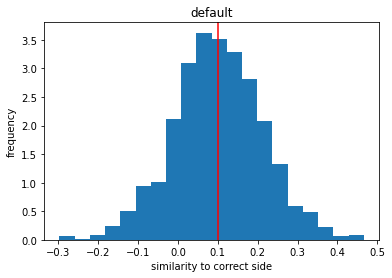

In [165]:
scores1 = plot_axes_quality('default')

BEST [('coastal.a.02_left', 0.4368380664249553), ('perfect.a.01_right', 0.4276876490635262), ('democratic.a.01_right', 0.42714771502742954), ('diligent.a.02_left', 0.42591022743403545), ('cosmopolitan.a.02_left', 0.41929372352248667), ('established.a.01_right', 0.4102471274492611), ('loyal.a.01_right', 0.4074099657427575), ('proved.a.01_right', 0.39257285403055947), ('diversified.a.01_left', 0.39057880322805066), ('mitigated.a.01_left', 0.37514608105111624)]
WORST [('lower-class.a.01_right', -0.2316134551583644), ('left.a.04_right', -0.20491319814158673), ('bidirectional.a.01_right', -0.19583210838399387), ('right.a.07_right', -0.19359646704819727), ('permeable.a.01_right', -0.1904021368740869), ('plausible.a.01_left', -0.189098644948643), ('right-handed.a.01_right', -0.1883303548346101), ('analytic.a.03_left', -0.1833651627472256), ('homemade.a.01_left', -0.18253034573641913), ('left-handed.a.01_left', -0.18238875183957756)]
AVG SIMILARITY TO CORRECT SIDE: 0.08704291958433


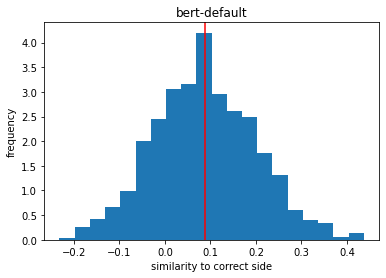

In [166]:
scores2 = plot_axes_quality('bert-default')

BEST [('established.a.01_right', 0.636359031254929), ('proved.a.01_right', 0.6069947009739739), ('coastal.a.02_left', 0.5444111445009973), ('democratic.a.01_right', 0.4940450998367891), ('diligent.a.02_left', 0.4832999204358368), ('metallic.a.01_right', 0.4729806360667726), ('intended.a.01_right', 0.46001247524519734), ('shod.a.01_right', 0.4518489139377991), ('attached.a.03_right', 0.45036379151797984), ('competent.a.01_right', 0.4463912399305633)]
WORST [('permeable.a.01_right', -0.2705601752339429), ('lower-class.a.01_right', -0.2620912966480911), ('right.a.01_right', -0.25037185741265783), ('analytic.a.03_left', -0.24327333916973268), ('digestible.a.01_left', -0.23355270547060525), ('centralizing.a.01_left', -0.22903649341725166), ('right-handed.a.01_right', -0.22704955655602474), ('bidirectional.a.01_right', -0.22493045615722074), ('right.a.07_right', -0.20999054116734406), ('simple.a.06_right', -0.20896867528317856)]
AVG SIMILARITY TO CORRECT SIDE: 0.11199743409278787


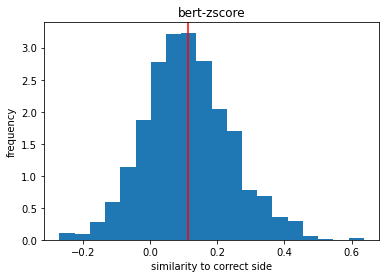

In [167]:
scores3 = plot_axes_quality('bert-zscore')

BEST [('assisted.a.01_left', 0.5327233324568565), ('democratic.a.01_right', 0.48314626517595566), ('rural.a.01_right', 0.4745505350215254), ('certain.a.02_right', 0.46775881940426245), ('coastal.a.02_left', 0.4565071632835247), ('future.a.01_left', 0.43953360280814907), ('specialized.a.01_right', 0.43691898026981285), ('complimentary.a.01_left', 0.4324316750865448), ('cooked.a.01_left', 0.43149409356962315), ('quiet.a.02_right', 0.41756053851095015)]
WORST [('homosexual.a.01_right', -0.2257058346241847), ('cooked.a.01_right', -0.22295638848041582), ('simple.a.06_right', -0.21018026697703546), ('lower-class.a.01_right', -0.2031483662722849), ('bidirectional.a.01_right', -0.19583210838399387), ('trustful.a.01_left', -0.19368569161999838), ('permeable.a.01_right', -0.1904021368740869), ('digestible.a.01_left', -0.18029774002567178), ('tidy.a.01_left', -0.17267687412646054), ('exact.a.01_right', -0.17253525104368947)]
AVG SIMILARITY TO CORRECT SIDE: 0.09114225765529424


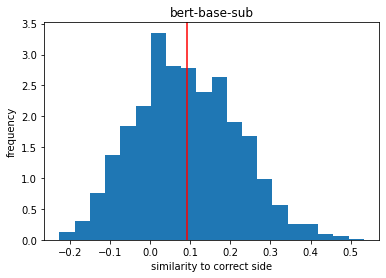

In [168]:
scores4 = plot_axes_quality('bert-base-sub')

BEST [('established.a.01_right', 0.6078804717238667), ('certain.a.02_right', 0.5914542340837428), ('proved.a.01_right', 0.5708034322401132), ('specialized.a.01_right', 0.5384322721678417), ('rural.a.01_right', 0.5309303157402877), ('tolerable.a.01_left', 0.525591955977725), ('coastal.a.02_left', 0.5152229968470149), ('complimentary.a.01_left', 0.49487367033383123), ('democratic.a.01_right', 0.4893213797685938), ('interesting.a.01_left', 0.48322091920077864)]
WORST [('permeable.a.01_right', -0.2705601752339429), ('homosexual.a.01_right', -0.2692241373654839), ('simple.a.06_right', -0.2524428322339026), ('lower-class.a.01_right', -0.24870724366063604), ('alkaline.a.01_left', -0.2425394521504315), ('centralizing.a.01_left', -0.22903649341725166), ('bidirectional.a.01_right', -0.22493045615722074), ('stressed.a.02_right', -0.21108812966578983), ('left.a.04_right', -0.19689151258349502), ('digestible.a.01_left', -0.1940071290263018)]
AVG SIMILARITY TO CORRECT SIDE: 0.11378734084380186


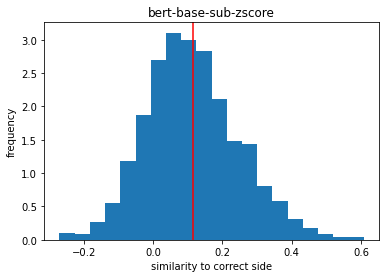

In [169]:
scores5 = plot_axes_quality('bert-base-sub-zscore')

BEST [('intellectual.a.02_left', 0.7736821048804584), ('ready.a.01_left', 0.7667368763895883), ('gracious.a.01_left', 0.7580105727797596), ('healthful.a.01_left', 0.753824827030452), ('rhetorical.a.02_left', 0.7477573550622412), ('conclusive.a.01_left', 0.7469388946043153), ('thinkable.a.01_right', 0.7437845450284777), ('corrupt.a.01_left', 0.7405056774743524), ('additive.a.02_left', 0.7360561807362979), ('serviceable.a.01_left', 0.7345996124440837)]
WORST [('intelligent.a.01_left', -0.4436716672611707), ('exact.a.01_right', -0.4391145513011482), ('north.a.01_left', -0.43817952217696843), ('conventional.a.04_left', -0.41157845004312754), ('hard.a.03_left', -0.3890352390213625), ('moderate.a.01_left', -0.3743192166060241), ('democratic.a.01_left', -0.37200301707681704), ('central.a.02_left', -0.36675983818179086), ('northern.a.04_left', -0.3612719163883658), ('heavenly.a.03_right', -0.35742899175992476)]
AVG SIMILARITY TO CORRECT SIDE: 0.09045991543478264


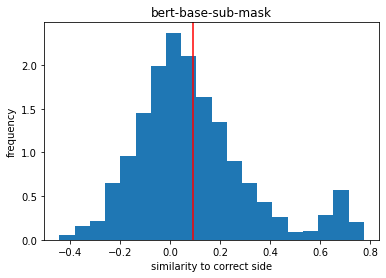

In [170]:
scores6 = plot_axes_quality('bert-base-sub-mask')

In [174]:
# U-tests
# z-scored bert substitutes vs. z-scored bert random
print(mannwhitneyu(list(scores5.values()), list(scores3.values())))
# z-scored bert random vs. glove
print(mannwhitneyu(list(scores1.values()), list(scores3.values())))

MannwhitneyuResult(statistic=1009212.0, pvalue=0.44578452121207457)
MannwhitneyuResult(statistic=1010294.0, pvalue=0.058653859770114364)
